# Robot Arm

## Forward Kinematics

### Position Vectors

Consider a robot with three arms of lengths $r_1, r_2, r_3$, connected by three joints. </br> The first joint is located at the origin and has two degrees of freedom: azimuth, $\phi_1$ and inclination, $\theta_1$. The Cartesian position vector of the second joint, $\mathbf{x}_1 = (x_1, y_1, z_1)$ is

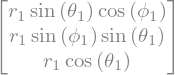

In [1]:
import sympy as sp
r1, phi1, theta1 = sp.symbols('r_1 phi_1 theta_1 ')  # radius, azimuth, inclination
dx1 = sp.Matrix([sp.sin(theta1) * sp.cos(phi1), sp.sin(theta1) * sp.sin(phi1), sp.cos(theta1)]) * r1; dx1

Let the second joint have one degree of freedom, the inclination of the second arm, $\theta_2$. The Cartesian incremental position vector of the second joint, $\mathbf{x}_2 = (x_2, y_2, z_2)$ is

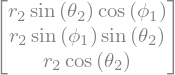

In [2]:
r2, theta2 = sp.symbols('r_2 theta_2')  # radius, inclination
dx2 = sp.Matrix([sp.sin(theta2) * sp.cos(phi1), sp.sin(theta2) * sp.sin(phi1), sp.cos(theta2)]) * r2; dx2

The absolute position vector of the end of arm 2 is then

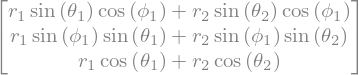

In [4]:
x2 = dx1 + dx2; x2

Let the third joint have two degrees of freedom, azimuth, $\phi_3$, and inclination, $\theta_3$ (absolute)

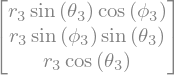

In [5]:
r3, phi3, theta3 = sp.symbols('r_3 phi_3 theta_3 ')  # radius, azimuth, inclination
dx3 = sp.Matrix([sp.sin(theta3) * sp.cos(phi3), sp.sin(theta3) * sp.sin(phi3), sp.cos(theta3)]) * r3; dx3

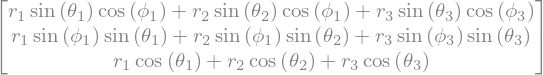

In [6]:
x3 = dx1 + dx2 + dx3; x3

The inclination of arm 2 relative to arm 1, $\Delta \theta_2$, is simply $\Delta \theta_2 = \theta_2 - \theta_1$

### Unit Vectors

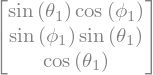

In [7]:
n1 = dx1 / r1; n1

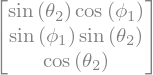

In [8]:
n2 = dx2/r2; n2

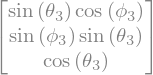

In [9]:
n3 = dx3 / r3; n3

In [10]:
v = sp.Matrix([0, 0, 1]); v

### Subtended Angles

Cosine of angle subtended between the vertical and arm 1

In [11]:
v.dot(n1)

Cosine of angle subtended between arm 1 and arm 2

In [12]:
sp.trigsimp(n1.dot(n2))

Cosine of angle subtended between arm 2 and arm 3

In [13]:
dtheta3 = sp.trigsimp(n2.dot(n3)); dtheta3

Normal to the plane containing arm 2 and arm 3 is the unit vector of the hinge joint axis

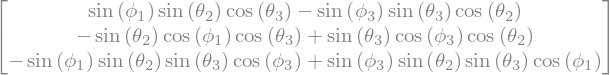

In [14]:
n23 = n2.cross(n3); n23

Cosine of angle subtends between the vertical and this normal

In [15]:
dphi3 = v.dot(n23); dphi3

### Motor Angles Given Absolute Arm Angles

Joint 1 is a swivel and hinge joint. Let the initial orientation of arm 1 be vertical with the axis of the hinge joint parallel to the x-axis.
The swivel angle of joint 1 is then $\Delta \phi_1$, and the hingle angle is $\Delta \theta_1$. These relative angles relate to the absolute angles of arm 1 according to </br>
$\Delta \theta_1 = \theta_1$ </br>
$\Delta \phi_1 = \phi_1$ 

Joint 2 is a hinge joint. Let the initial orientation of arm 2 be vertical with the axis of the hinge joint parallel to the x-axis.
The hingle angle relative to arm 1 is $\Delta \theta_2$. This relative angle relates to the absolute angles of arms 1 and 2 according to </br>
$\Delta \theta_2 = \theta_1 - \theta_2$

Joint 3 is a swivel and hinge joint. Let the initial orientation of arm 3 be vertical with the axis of the hinge joint parallel to the x-axis.
The swivel angle of joint 3 relative to the vertical is then $\Delta \phi_3$, and the hingle angle is $\Delta \theta_3$. These relative angles relate to the absolute angles of arms 1, 2, and 3 according to </br>
$\cos(\Delta \theta_3) = \sin{\left(\theta_{2} \right)} \sin{\left(\theta_{3} \right)} \cos{\left(\phi_{1} - \phi_{3} \right)} + \cos{\left(\theta_{2} \right)} \cos{\left(\theta_{3} \right)}$ </br>
$\cos (\Delta \phi_3) = - \sin{\left(\phi_{1} \right)} \sin{\left(\theta_{2} \right)} \sin{\left(\theta_{3} \right)} \cos{\left(\phi_{3} \right)} + \sin{\left(\phi_{3} \right)} \sin{\left(\theta_{2} \right)} \sin{\left(\theta_{3} \right)} \cos{\left(\phi_{1} \right)}$

### Absolute Arm Angles Given End Position and End Orientation

For a given end point, $\mathbf{x} = (x, y, z)$, and arm 3 azimuth, $\phi_3$, and arm 3 inclination, $\theta_3$. </br>
The end point of arm 3 is then

In [16]:
x, y, z = sp.symbols('x y z')  # end point
x3v = sp.Matrix([x, y, z]); x3v

The end point of arm 2 follows as

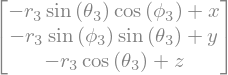

In [17]:
x2v = x3v - dx3; x2v

The horizontal component of this position vector is

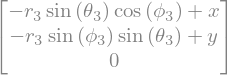

In [18]:
x2vh = x2v - x2v.dot(v)*v; x2vh

The unit vector in this direction is

In [19]:
x2vhn = x2vh / sp.sqrt(x2vh.dot(x2vh)); sp.simplify(x2vn)

NameError: name 'x2vn' is not defined

The swivel angle of joint 1 is the azimuth of the arm 1 which is the angle subtended to the x-axis. The cosine of the angle subjected to the x-axis is

In [ ]:
xn = sp.Matrix([1, 0, 0])
x2vhn.dot(xn)